In [250]:
import numpy as np
from numpy import zeros, newaxis
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [251]:
df1 = pd.read_csv('CO2_O2_0_1.csv', header = 0)

In [252]:
df1.head()

,Wavelength (cm-1),CO2:O2=0:1 (Absorbance)
0,1000.409,0.000104
1,1000.891,0.000085
2,1001.373,0.000053
3,1001.855,0.000111
4,1002.337,0.000251


In [253]:
df3 = pd.read_csv('CO2_O2_1_0.csv', header = 0)
df3.head()

,Wavelength (cm-1),CO2:O2=1:0 (Absorbance)
0,1000.409,0.000148
1,1000.891,0.000137
2,1001.373,0.000052
3,1001.855,0.000004
4,1002.337,0.000108


In [254]:
df2 = pd.read_csv('CO2_O2_15_1.csv', header = 0)
df2.head()

,Wavelength (cm-1),CO2:O2=15:1 (Absorbance)
0,1000.409,-0.000160
1,1000.891,-0.000038
2,1001.373,-0.000192
3,1001.855,-0.000356
4,1002.337,-0.000081


In [255]:
df4 = pd.read_csv('CO2_O2_1_1.csv')
df4.head()

,Wavelength (cm-1),CO2:O2=1:1 (Absorbance)
0,1000.409,-0.000105
1,1000.891,-0.000178
2,1001.373,-0.000178
3,1001.855,-0.000148
4,1002.337,-0.000117


In [256]:
df5 = pd.read_csv('CO2_O2_1_3.csv')
df5.head()

,Wavelength (cm-1),CO2:O2=1:3 (Absorbance)
0,1000.409,0.000109
1,1000.891,0.000107
2,1001.373,0.000184
3,1001.855,0.000163
4,1002.337,0.000012


In [257]:
df6 = pd.read_csv('CO2_O2_1_6.csv')
df6.head()

,Wavelength (cm-1),CO2:O2=1:6 (Absorbance)
0,1000.409,0.000100
1,1000.891,0.000238
2,1001.373,0.000313
3,1001.855,0.000234
4,1002.337,0.000122


In [258]:
df7 = pd.read_csv('CO2_O2_3_1.csv')
df7.head()

,Wavelength (cm-1),CO2:O2=3:1 (Absorbance)
0,1000.409,0.000048
1,1000.891,0.000033
2,1001.373,-0.000079
3,1001.855,-0.000263
4,1002.337,-0.000228


In [259]:
df8 = pd.read_csv('CO2_O2_5_1.csv')
df8.head()

,Wavelength (cm-1),CO2:O2=5:1 (Absorbance)
0,1000.409,8.410000e-05
1,1000.891,-1.580000e-04
2,1001.373,-6.250000e-07
3,1001.855,1.560000e-04
4,1002.337,4.010000e-05


In [260]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True, axis = 0, sort = False)
df.head()

,Wavelength (cm-1),CO2:O2=0:1 (Absorbance),CO2:O2=15:1 (Absorbance),CO2:O2=1:0 (Absorbance),CO2:O2=1:1 (Absorbance),CO2:O2=1:3 (Absorbance),CO2:O2=1:6 (Absorbance),CO2:O2=3:1 (Absorbance),CO2:O2=5:1 (Absorbance)
0,1000.409,0.000104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000.891,0.000085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001.373,0.000053,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1001.855,0.000111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1002.337,0.000251,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
df.shape

(1344, 9)

# Missing Value Imputation

In [262]:
df['Wavelength (cm-1)'].fillna(value = df['Wavelength (cm-1)'].mean(), inplace = True)
df['CO2:O2=0:1 (Absorbance)'].fillna(value = df['CO2:O2=0:1 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=15:1 (Absorbance)'].fillna(value = df['CO2:O2=15:1 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=1:0 (Absorbance)'].fillna(value = df['CO2:O2=1:0 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=1:1 (Absorbance)'].fillna(value = df['CO2:O2=1:1 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=1:3 (Absorbance)'].fillna(value = df['CO2:O2=1:3 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=1:6 (Absorbance)'].fillna(value = df['CO2:O2=1:6 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=3:1 (Absorbance)'].fillna(value = df['CO2:O2=3:1 (Absorbance)'].mean(), inplace = True)
df['CO2:O2=5:1 (Absorbance)'].fillna(value = df['CO2:O2=5:1 (Absorbance)'].mean(), inplace = True)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 9 columns):
Wavelength (cm-1)           1344 non-null float64
CO2:O2=0:1 (Absorbance)     1344 non-null float64
CO2:O2=15:1 (Absorbance)    1344 non-null float64
CO2:O2=1:0 (Absorbance)     1344 non-null float64
CO2:O2=1:1 (Absorbance)     1344 non-null float64
CO2:O2=1:3 (Absorbance)     1344 non-null float64
CO2:O2=1:6 (Absorbance)     1344 non-null float64
CO2:O2=3:1 (Absorbance)     1344 non-null float64
CO2:O2=5:1 (Absorbance)     1344 non-null float64
dtypes: float64(9)
memory usage: 94.6 KB


In [264]:
df.head()

,Wavelength (cm-1),CO2:O2=0:1 (Absorbance),CO2:O2=15:1 (Absorbance),CO2:O2=1:0 (Absorbance),CO2:O2=1:1 (Absorbance),CO2:O2=1:3 (Absorbance),CO2:O2=1:6 (Absorbance),CO2:O2=3:1 (Absorbance),CO2:O2=5:1 (Absorbance)
0,1000.409,0.000104,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
1,1000.891,0.000085,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
2,1001.373,0.000053,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
3,1001.855,0.000111,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
4,1002.337,0.000251,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797


# Outliers Treatment

In [265]:
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

,Wavelength (cm-1),CO2:O2=0:1 (Absorbance),CO2:O2=15:1 (Absorbance),CO2:O2=1:0 (Absorbance),CO2:O2=1:1 (Absorbance),CO2:O2=1:3 (Absorbance),CO2:O2=1:6 (Absorbance),CO2:O2=3:1 (Absorbance),CO2:O2=5:1 (Absorbance)
0,1000.409,0.000104,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
1,1000.891,0.000085,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
2,1001.373,0.000053,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
3,1001.855,0.000111,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
4,1002.337,0.000251,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
5,1002.819,0.000291,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
6,1003.301,0.000146,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
7,1003.784,0.000149,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
8,1004.266,0.000131,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
9,1004.748,0.000103,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797


In [266]:
df.shape

(1344, 9)

# x,y split

In [267]:
x = df.loc[:,df.columns!="Wavelength (cm-1)"]
type(y)
x.head()

,CO2:O2=0:1 (Absorbance),CO2:O2=15:1 (Absorbance),CO2:O2=1:0 (Absorbance),CO2:O2=1:1 (Absorbance),CO2:O2=1:3 (Absorbance),CO2:O2=1:6 (Absorbance),CO2:O2=3:1 (Absorbance),CO2:O2=5:1 (Absorbance)
0,0.000104,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
1,0.000085,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
2,0.000053,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
3,0.000111,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797
4,0.000251,0.000624,0.000282,0.001511,0.00179,0.002626,0.001083,0.000797


In [268]:
y = df['Wavelength (cm-1)']
y.head()

0    1000.409
1    1000.891
2    1001.373
3    1001.855
4    1002.337
Name: Wavelength (cm-1), dtype: float64

In [269]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)
x_train.head()

,CO2:O2=0:1 (Absorbance),CO2:O2=15:1 (Absorbance),CO2:O2=1:0 (Absorbance),CO2:O2=1:1 (Absorbance),CO2:O2=1:3 (Absorbance),CO2:O2=1:6 (Absorbance),CO2:O2=3:1 (Absorbance),CO2:O2=5:1 (Absorbance)
682,0.005092,0.000624,0.000282,0.001511,0.000177,0.002626,0.001083,0.000797
319,0.005092,-0.000165,0.000282,0.001511,0.001790,0.002626,0.001083,0.000797
563,0.005092,0.000624,0.000282,0.000629,0.001790,0.002626,0.001083,0.000797
1001,0.005092,0.000624,0.000282,0.001511,0.001790,0.000098,0.001083,0.000797
892,0.005092,0.000624,0.000282,0.001511,0.001790,-0.000251,0.001083,0.000797


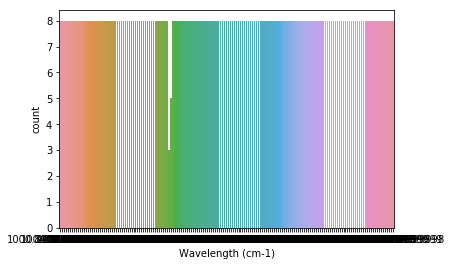

In [270]:
sns.countplot(y, data=df)

In [271]:
x_train.shape

(1075, 8)

In [272]:
x_test.shape

(269, 8)

In [273]:
y_train.shape

(1075,)

In [274]:
y_test.shape

(269,)

In [275]:
# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

In [276]:
# Fitting the scaler using available training data
input_scaler = scaler_x.fit(x_train)

In [277]:
imput_scaler2 = scaler_y.fit(x_test)

In [278]:
train_y_norm = input_scaler.transform(x_train)

In [279]:
# Applying the scaler to training data
train_x_norm = input_scaler.transform(x_train)

In [280]:
# Applying the scaler to test data
test_x_norm = input_scaler.transform(x_test)

In [281]:
train_x_norm

array([[0.16678588, 0.16842144, 0.17575315, ..., 0.17534783, 0.17896451,
        0.1789748 ],
       [0.16678588, 0.04750276, 0.17575315, ..., 0.17534783, 0.17896451,
        0.1789748 ],
       [0.16678588, 0.16842144, 0.17575315, ..., 0.17534783, 0.17896451,
        0.1789748 ],
       ...,
       [0.16678588, 0.16842144, 0.17575315, ..., 0.17534783, 0.17896451,
        0.05702365],
       [0.16678588, 0.16842144, 0.17575315, ..., 0.17534783, 0.17896451,
        0.1789748 ],
       [0.16678588, 0.16842144, 0.17575315, ..., 0.17534783, 0.17896451,
        0.1789748 ]])

In [282]:
train_x_norm.shape

(1075, 8)

# creating 3D array because LSTM accept 3D

In [283]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 30
x_test, y_test = create_dataset(test_x_norm, test_x_norm,   
                                TIME_STEPS)
x_train, y_train = create_dataset(train_x_norm, train_x_norm, 
                                  TIME_STEPS)
print('x_train.shape: ', x_test.shape)
print('y_train.shape: ', y_train.shape)
print('x_test.shape: ', x_test.shape)
print('y_test.shape: ', y_train.shape)

x_train.shape:  (239, 30, 8)
y_train.shape:  (1045, 8)
x_test.shape:  (239, 30, 8)
y_test.shape:  (1045, 8)


# Now building our LSTM model

In [284]:
model1 = Sequential()
model1.add(LSTM((1), batch_input_shape = (None, 5, 1), return_sequences = True))

In [285]:
model1.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics=['accuracy'])

In [286]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 5, 1)              12        
Total params: 12
Trainable params: 12
Non-trainable params: 0
_________________________________________________________________


In [287]:
#history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

In [288]:
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [x_train.shape[1], x_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

In [289]:
model_lstm = create_model(50,LSTM)

In [290]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(x_train, y_train, epochs = 10,  
                        validation_split = 0.2, batch_size = 32, 
                        shuffle = False, callbacks = [early_stop])
    return history

history_lstm = fit_model(model_lstm)

Train on 836 samples, validate on 209 samples
Epoch 1/10
836/836 [==============================] - 13s 16ms/sample - loss: 0.0127 - val_loss: 0.0099
Epoch 2/10
836/836 [==============================] - 4s 5ms/sample - loss: 0.0106 - val_loss: 0.0098
Epoch 3/10
836/836 [==============================] - 3s 4ms/sample - loss: 0.0105 - val_loss: 0.0098
Epoch 4/10
836/836 [==============================] - 3s 4ms/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 5/10
836/836 [==============================] - 5s 5ms/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 6/10
836/836 [==============================] - 6s 7ms/sample - loss: 0.0105 - val_loss: 0.0098
Epoch 7/10
836/836 [==============================] - 6s 7ms/sample - loss: 0.0103 - val_loss: 0.0098
Epoch 8/10
836/836 [==============================] - 5s 5ms/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 9/10
836/836 [==============================] - 7s 8ms/sample - loss: 0.0104 - val_loss: 0.0098
Epoch 10/10
836/836 [=============

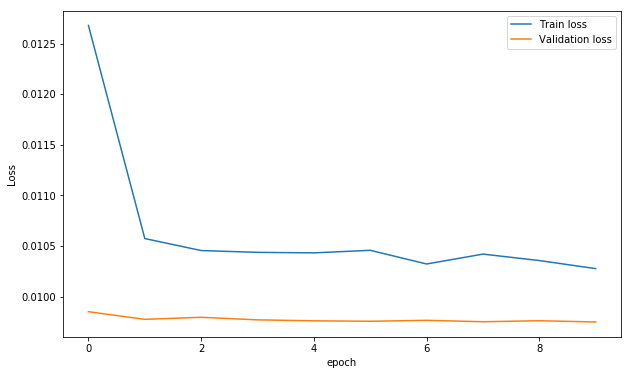

In [291]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')

plot_loss (history_lstm)

In [292]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [293]:
# Make prediction
def prediction(model):
    prediction = model.predict(x_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_lstm = prediction(model_lstm)

ValueError: non-broadcastable output operand with shape (239,1) doesn't match the broadcast shape (239,8)

In [ ]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    
evaluate_prediction(prediction_lstm, y_test, 'LSTM')